In [192]:
import numpy as np
import pandas as pd
import os 
from sklearn.linear_model import LinearRegression
import math
import matplotlib.pyplot as plt

# 1.1 . Read data 

In [193]:
data=pd.read_excel(r'iris_setosa.xls')

*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [194]:
data.head()

,X,Y
0,3.5,5.1
1,3.0,4.9
2,3.2,4.7
3,3.1,4.6
4,3.6,5.0


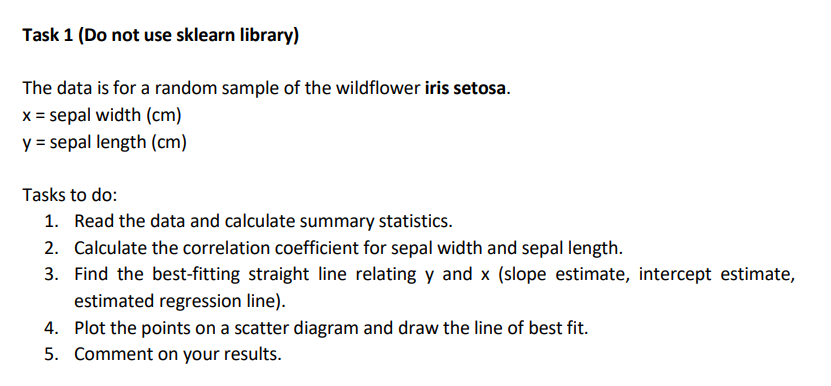

# Summary statistics

In [19]:
X=data['X']
Y=data['Y']

In [20]:
sum_x = np.sum(X)
sum_x2 = np.sum([i*i for i in X])
print(sum_x)
print(sum_x2)

165.2
575.3600000000001


In [21]:
sum_y = np.sum(Y)
sum_y2 = np.sum([i*i for i in Y])
print(sum_y)
print(sum_y2)

240.4
1210.04


# 1.2 Correlation coefficient

In [58]:
l=len(X)
sum_x=sum(X)
sum_y=sum(Y)
x_y=X*Y
sum_x_y=sum(x_y)
x2_sum=sum(X**2)
x2=X**2
y2_sum=sum(Y**2)
y2=Y**2
x2_sum


575.3600000000002

In [215]:
corr_coef=(l*sum(X*Y)-(sum(X)*sum(Y)))/math.sqrt((l*x2_sum-(sum(X)**2))*(l*y2_sum-(sum(Y)**2)))
print('Correlation coefficient is equal to' , corr_coef)

Correlation coefficient is equal to 0.7014909203218759


# 1.3 Find the best-fitting straight line relating y and x (slope estimate, intercept estimate, estimated regression line).

In [204]:
sum_y2 = np.sum([i*i for i in Y])
sum_x2 = np.sum([i*i for i in X])


slope = (sum(X*Y) - sum(X)*sum(Y)/l)/(sum_x2 - sum(x)*sum(x)/l)
print('slope is equal to :' ,slope)

slope is equal to : 0.6611083864639857


In [205]:
intercept = sum(Y)/l - slope*sum(X)/l
print('intercept is equal to :' ,intercept)

intercept is equal to : 2.733018636586448


**Estimated regression line is equal to :**

$$\hat{y} = 2.733 + 0.66x$$

In [206]:
X1 = np.array(X)
y2 = np.array(Y)
y_pred = intercept + slope*X1

In [208]:
print('Prediction is equal to :' )
y_pred

Prediction is equal to :


array([5.04689799, 4.7163438 , 4.84856547, 4.78245463, 5.11300883,
       5.31134134, 4.98078715, 4.98078715, 4.65023296, 4.78245463,
       5.17911967, 4.98078715, 4.7163438 , 5.37745218, 5.64189554,
       5.31134134, 5.04689799, 5.24523051, 5.24523051, 4.98078715,
       5.17911967, 5.11300883, 4.91467631, 4.98078715, 4.7163438 ,
       4.98078715, 5.04689799, 4.98078715, 4.84856547, 4.78245463,
       4.98078715, 5.44356302, 5.50967386, 4.78245463, 4.84856547,
       5.04689799, 5.11300883, 4.7163438 , 4.98078715, 5.04689799,
       4.25356793, 4.84856547, 5.04689799, 5.24523051, 4.7163438 ,
       5.24523051, 5.17911967, 4.91467631])

# 1.4. Plot the points on scatter diagram

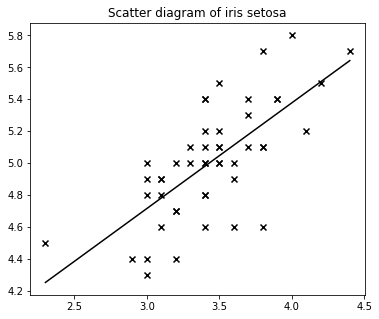

In [189]:
plt.figure(figsize=(6,5))
plt.scatter(X1, y2, c='black', marker='x') 
plt.plot([min(X1), max(X1)], [min(y_pred), max(y_pred)], color='black')  # regression line

plt.title('Scatter diagram of iris setosa')
plt.show()

# 1.5 Comments

**So by the following code we could observe how to calculate metrics of fit without using sklearn library**

**In order to get the result we should calculate all values that may be useful for slope and intercept.**

**Correlation = 0.701 considered strong positive correlation coefficient**

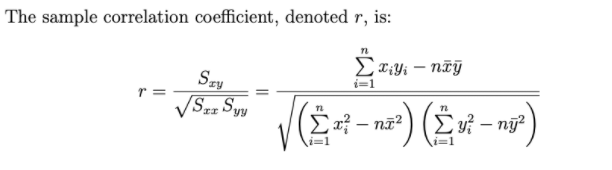

**Formula to determine slope :**

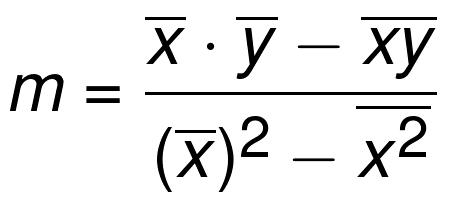

**Formula for intercept :**

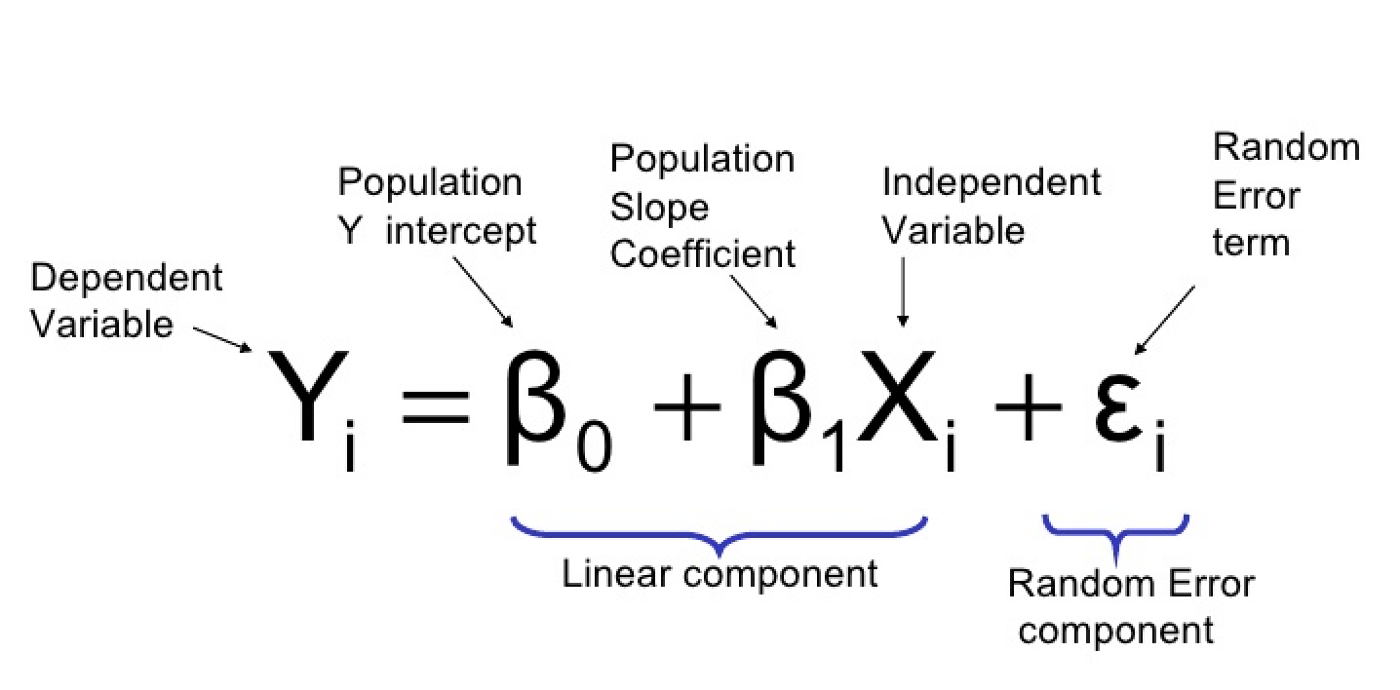

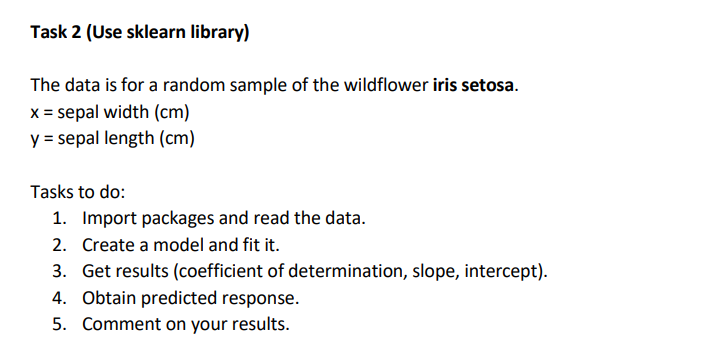

# 2.1 Import packages 

In [190]:
from sklearn.linear_model import LinearRegression

# 2.2 Create model and fit it

In [210]:
X1 = np.array(X).reshape((-1, 1))
y2 = np.array(Y)

model_lr = LinearRegression().fit(X1, y2)
R_sq = model_lr.score(X1, y2)
corr_coef = np.sqrt(R_sq)
print('Correlation coefficient:', np.round(corr_coef, 4))

Correlation coefficient: 0.7015


# 2.3 Get results

In [214]:
print('Coefficient of determination:', np.round(R_sq, 3))

Coefficient of determination: 0.492


In [209]:
print('Intercept is equal to:', np.round(model_lr.intercept_,3))
print('Slope is equal to :', np.round(model_lr.coef_,3))

Intercept is equal to: 2.417
Slope is equal to : [0.757]


# 2.4 Obtain predicted response

In [211]:
y_pred1 = model_lr.predict(X1)
print('Predicted response:', y_pred1, sep='\n')

Predicted response:
[5.04689799 4.7163438  4.84856547 4.78245463 5.11300883 5.31134134
 4.98078715 4.98078715 4.65023296 4.78245463 5.17911967 4.98078715
 4.7163438  5.37745218 5.64189554 5.31134134 5.04689799 5.24523051
 5.24523051 4.98078715 5.17911967 5.11300883 4.91467631 4.98078715
 4.7163438  4.98078715 5.04689799 4.98078715 4.84856547 4.78245463
 4.98078715 5.44356302 5.50967386 4.78245463 4.84856547 5.04689799
 5.11300883 4.7163438  4.98078715 5.04689799 4.25356793 4.84856547
 5.04689799 5.24523051 4.7163438  5.24523051 5.17911967 4.91467631]


In [212]:
y_pred1 = model_lr.intercept_ + model_lr.coef_ * X1
print('predicted response:', y_pred1, sep='\n')

predicted response:
[[5.04689799]
 [4.7163438 ]
 [4.84856547]
 [4.78245463]
 [5.11300883]
 [5.31134134]
 [4.98078715]
 [4.98078715]
 [4.65023296]
 [4.78245463]
 [5.17911967]
 [4.98078715]
 [4.7163438 ]
 [5.37745218]
 [5.64189554]
 [5.31134134]
 [5.04689799]
 [5.24523051]
 [5.24523051]
 [4.98078715]
 [5.17911967]
 [5.11300883]
 [4.91467631]
 [4.98078715]
 [4.7163438 ]
 [4.98078715]
 [5.04689799]
 [4.98078715]
 [4.84856547]
 [4.78245463]
 [4.98078715]
 [5.44356302]
 [5.50967386]
 [4.78245463]
 [4.84856547]
 [5.04689799]
 [5.11300883]
 [4.7163438 ]
 [4.98078715]
 [5.04689799]
 [4.25356793]
 [4.84856547]
 [5.04689799]
 [5.24523051]
 [4.7163438 ]
 [5.24523051]
 [5.17911967]
 [4.91467631]]


# 2.5 Creating model using sklearn library  

**By observing code on the top we could define that usage of sklearn library could be more efficient way to determine predicted answers and metrics.**

**Defining of correlation coefficient could be easier just by use formula**

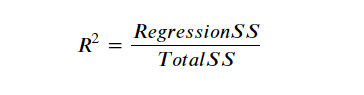

**We should call .reshape() on x because this array is required to be two-dimensional, or to be more precise, to have one column and as many rows as necessary. That’s exactly what the argument (-1, 1) of .reshape() specifies while we do work with sklearn library.**

**So then by the built-in metrics of model_lr.() to determine metrics like coef. of determination , intersect , slope**

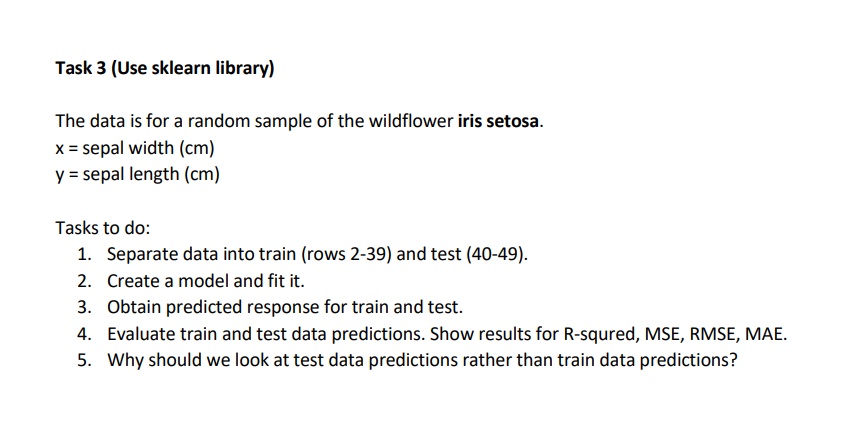

# 3.1. Splitting data into train and test

In [195]:
from sklearn.model_selection import train_test_split
# Define explanatory variable (X) and dependent variable (y) in test data
x_train=data[['X']][0:38]
x_test=data[['X']][38:48]
y_train=data['Y'][0:38]
y_test=data['Y'][38:48]


# 3.2. Create model and fit it

In [196]:
model_lr = LinearRegression().fit(x_train, y_train)

# 3.3. Predicted response for train and test

In [197]:
train_pred = model_lr.predict(x_train)
print(train_pred)

[5.06801341 4.68935583 4.84081887 4.76508735 5.14374493 5.37093948
 4.9922819  4.9922819  4.61362432 4.76508735 5.21947645 4.9922819
 4.68935583 5.44667099 5.74959706 5.37093948 5.06801341 5.29520796
 5.29520796 4.9922819  5.21947645 5.14374493 4.91655038 4.9922819
 4.68935583 4.9922819  5.06801341 4.9922819  4.84081887 4.76508735
 4.9922819  5.52240251 5.59813403 4.76508735 4.84081887 5.06801341
 5.14374493 4.68935583]


In [198]:
test_pred = model_lr.predict(x_test)
print(test_pred)

[4.9922819  5.06801341 4.15923522 4.84081887 5.06801341 5.29520796
 4.68935583 5.29520796 5.21947645 4.91655038]


# 3.4. R-square , MSE , RMSE, MAE

In [199]:
from sklearn import metrics

In [200]:
def print_evaluate(true, predicted):  
    r2_square = metrics.r2_score(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    mae = metrics.mean_absolute_error(true, predicted)
    print('R-squared', np.round(r2_square,3))
    print('MSE:', np.round(mse,3))
    print('RMSE:', np.round(rmse,3))
    print('MAE:', np.round(mae,3))

In [201]:
print_evaluate(y_train, train_pred)

R-squared 0.552
MSE: 0.06
RMSE: 0.244
MAE: 0.202


In [202]:
print_evaluate(y_test, test_pred)

R-squared -0.132
MSE: 0.088
RMSE: 0.296
MAE: 0.219


# 3.5. Observe test data prediction rather than Train 

**Because using machine learning we can train our train dataset to check it then on test dataset . Our final goal is to reach the predicted values to test set , so we contribute amount of data for the proportion 80 and 20 .**

**The first subset is used to fit the model and is referred to as the training dataset. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.**

**Train Dataset: Used to fit the machine learning model.
Test Dataset: Used to evaluate the fit machine learning model.
The objective is to estimate the performance of the machine learning model on new data: data not used to train the model.**


**The idea of “sufficiently large” is specific to each predictive modeling problem. It means that there is enough data to split the dataset into train and test datasets and each of the train and test datasets are suitable representations of the problem domain. This requires that the original dataset is also a suitable representation of the problem domain.**